In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('sniff_data.txt')

/home/sahaj/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data

,Trial,Object,Idle_State,Approach_State,Conversation,Looking_for_Object,Navigate_to_Object,Location
0,1,ball,1,1,1,1,1,4
1,2,water_bottle,0,1,1,0,0,4
2,3,water_bottle,1,1,1,1,1,1
3,4,water_bottle,0,1,1,0,0,2
4,5,water_bottle,1,1,1,1,0,1
5,6,water_bottle,0,1,1,0,0,1
6,7,water_bottle,0,1,1,0,0,3
7,8,phone,1,1,1,1,1,2
8,9,phone,0,1,1,1,0,3
9,10,phone,1,1,1,1,1,4


In [3]:
data.columns

Index(['Trial', 'Object', 'Idle_State', 'Approach_State', 'Conversation',
       'Looking_for_Object', 'Navigate_to_Object', 'Location'],
      dtype='object')

In [4]:
# Melt the dataframe for easier plotting of states
states_df = data.melt(id_vars=['Trial', 'Object', 'Location'], 
                      value_vars=['Idle_State', 'Approach_State', 'Conversation', 
                                'Looking_for_Object', 'Navigate_to_Object'],
                      var_name='State', value_name='Success')

# Calculate weighted average success rate
weights = {
    'Idle_State': 0.05,
    'Approach_State': 0.05,
    'Conversation': 0.3,
    'Looking_for_Object': 0.3,
    'Navigate_to_Object': 0.3
}

# Calculate weighted and full process success rates
weighted_success = []
full_success = []
objects = data['Object'].unique()

for obj in objects:
    obj_data = data[data['Object'] == obj]
    
    # Weighted success
    weighted_avg = sum(obj_data[state].mean() * weight 
                      for state, weight in weights.items())
    weighted_success.append(weighted_avg)
    
    # Full process success (all states must be 1)
    full_proc = (obj_data[list(weights.keys())].prod(axis=1) == 1).mean()
    full_success.append(full_proc)

In [5]:
states_df

,Trial,Object,Location,State,Success
0,1,ball,4,Idle_State,1
1,2,water_bottle,4,Idle_State,0
2,3,water_bottle,1,Idle_State,1
3,4,water_bottle,2,Idle_State,0
4,5,water_bottle,1,Idle_State,1
...,...,...,...,...,...
95,16,backpack,1,Navigate_to_Object,1
96,17,bowl,1,Navigate_to_Object,1
97,18,bowl,2,Navigate_to_Object,1
98,19,bowl,3,Navigate_to_Object,0


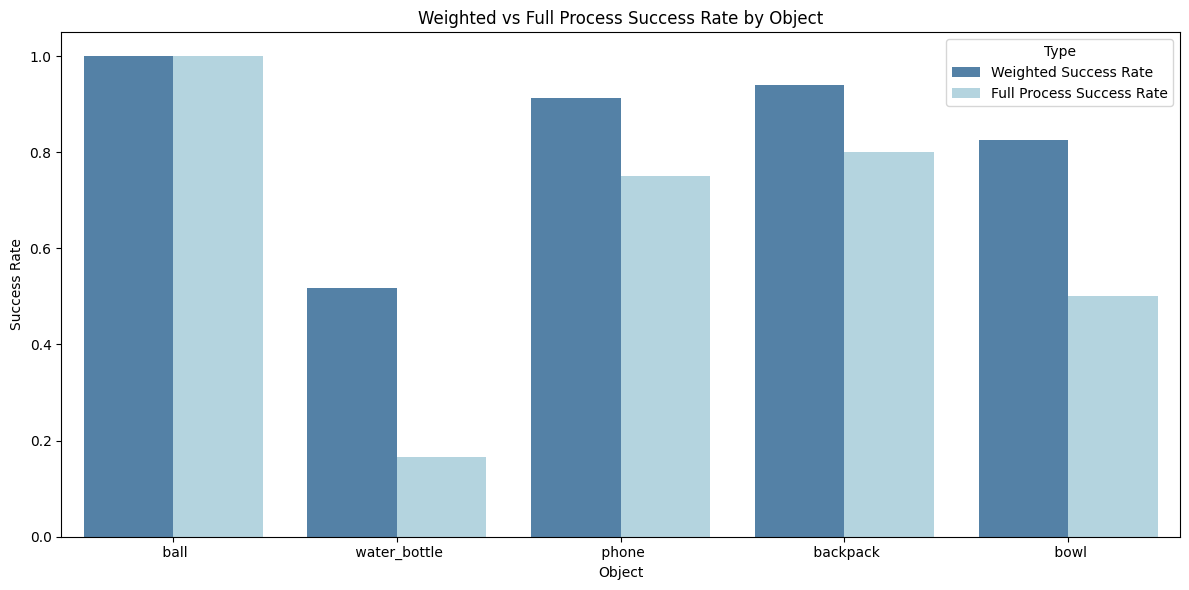

In [6]:
# First restructure the data into a long format
success_data = pd.DataFrame({
    'Object': objects.tolist() * 2,
    'Success_Rate': weighted_success + full_success,
    'Type': ['Weighted Success Rate'] * len(objects) + ['Full Process Success Rate'] * len(objects)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=success_data, 
            x='Object', 
            y='Success_Rate', 
            hue='Type',
            palette=['steelblue', 'lightblue'])

plt.xlabel('Object')
plt.ylabel('Success Rate')
plt.title('Weighted vs Full Process Success Rate by Object')
plt.tight_layout()
plt.show()

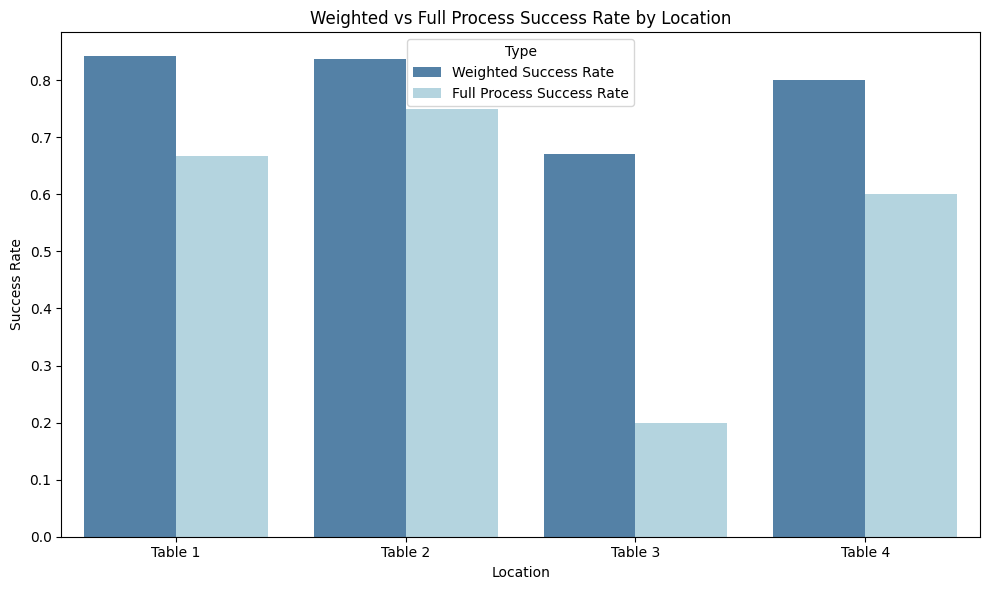

In [7]:
# First restructure the data into a long format for locations
success_data_loc = pd.DataFrame({
    'Location': [f'Table {i}' for i in range(1,5)] * 2,
    'Success_Rate': [
        # Calculate weighted success per location
        *[sum(data[data['Location'] == loc][state].mean() * weight 
            for state, weight in weights.items()) 
          for loc in range(1,5)],
        # Calculate full process success per location
        *[(data[data['Location'] == loc][list(weights.keys())].prod(axis=1) == 1).mean() 
          for loc in range(1,5)]
    ],
    'Type': ['Weighted Success Rate'] * 4 + ['Full Process Success Rate'] * 4
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=success_data_loc, 
            x='Location', 
            y='Success_Rate', 
            hue='Type',
            palette=['steelblue', 'lightblue'])

plt.xlabel('Location')
plt.ylabel('Success Rate')
plt.title('Weighted vs Full Process Success Rate by Location')
plt.tight_layout()
plt.show()

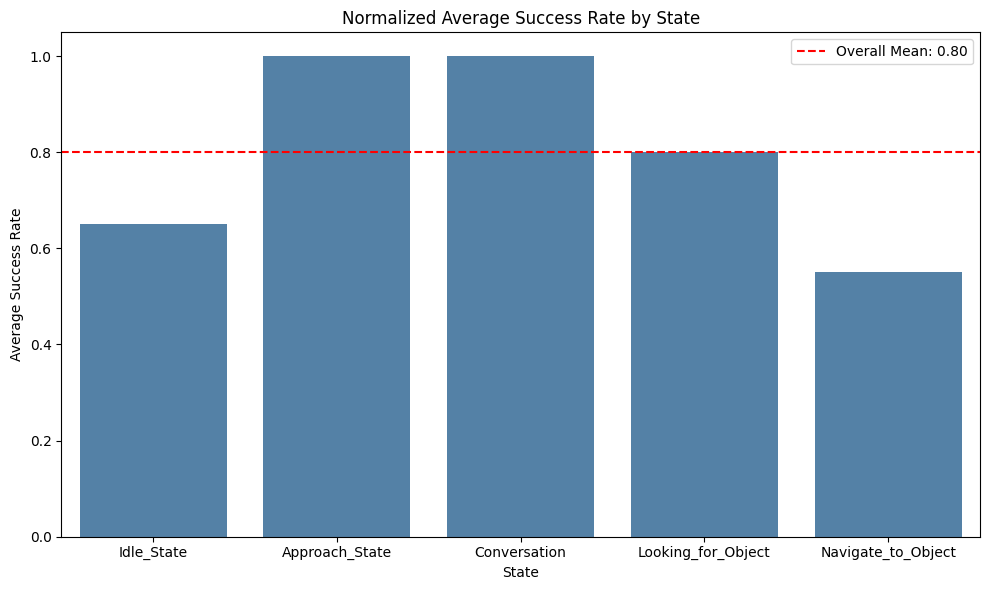

In [8]:
# Calculate normalized average success rate across all objects for each state
state_avg = pd.DataFrame({
    'State': list(weights.keys()),
    'Success_Rate': [data[state].mean() for state in weights.keys()]
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=state_avg, 
            x='State', 
            y='Success_Rate',
            color='steelblue')

plt.xlabel('State')
plt.ylabel('Average Success Rate')
plt.title('Normalized Average Success Rate by State')
plt.axhline(y=state_avg['Success_Rate'].mean(), color='r', linestyle='--', 
            label=f'Overall Mean: {state_avg["Success_Rate"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

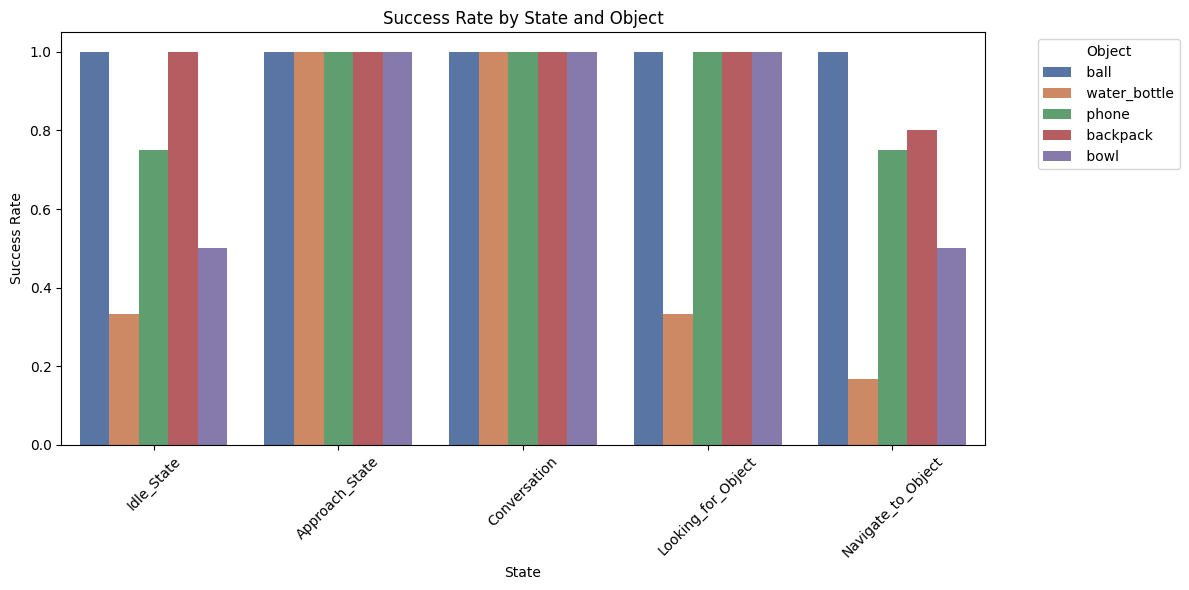

In [9]:
# First restructure the data for state-wise object grouping
state_success = pd.DataFrame({
    'State': np.repeat(list(weights.keys()), len(objects)),
    'Object': objects.tolist() * len(weights),
    'Success_Rate': [data[data['Object'] == obj][state].mean() 
                    for state in weights.keys() 
                    for obj in objects]
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=state_success, 
            x='State', 
            y='Success_Rate', 
            hue='Object',
            palette='deep')

plt.xlabel('State')
plt.ylabel('Success Rate')
plt.title('Success Rate by State and Object')
plt.xticks(rotation=45)
plt.legend(title='Object', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

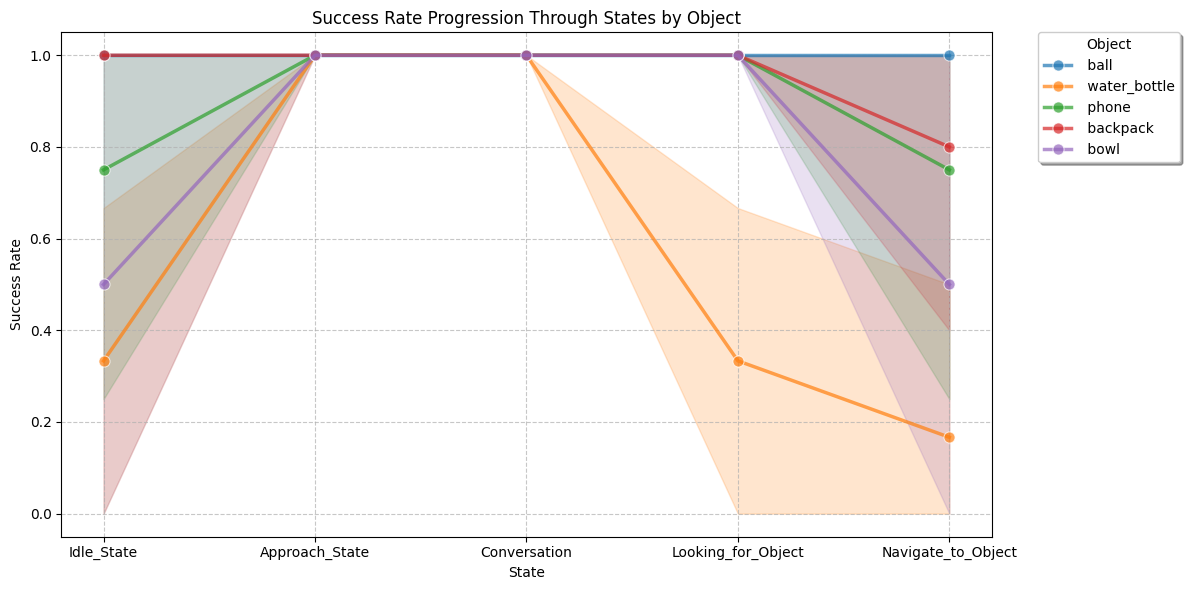

In [10]:
# Create ordered list of states
state_order = ['Idle_State', 'Approach_State', 'Conversation', 'Looking_for_Object', 'Navigate_to_Object']

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data.melt(id_vars=['Object', 'Location'], 
                           value_vars=state_order,
                           var_name='State', 
                           value_name='Success_Rate'),
             x='State',
             y='Success_Rate',
             hue='Object',
             marker='o',
             markersize=8,
             sort=False,
             linewidth=2.5,  # Make lines thicker
             alpha=0.7)      # Add some transparency

plt.xlabel('State')
plt.ylabel('Success Rate')
plt.title('Success Rate Progression Through States by Object')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust legend position and style
plt.legend(title='Object', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left',
          borderaxespad=0,
          frameon=True,
          shadow=True)

# Ensure layout looks good with legend
plt.tight_layout()
plt.show()

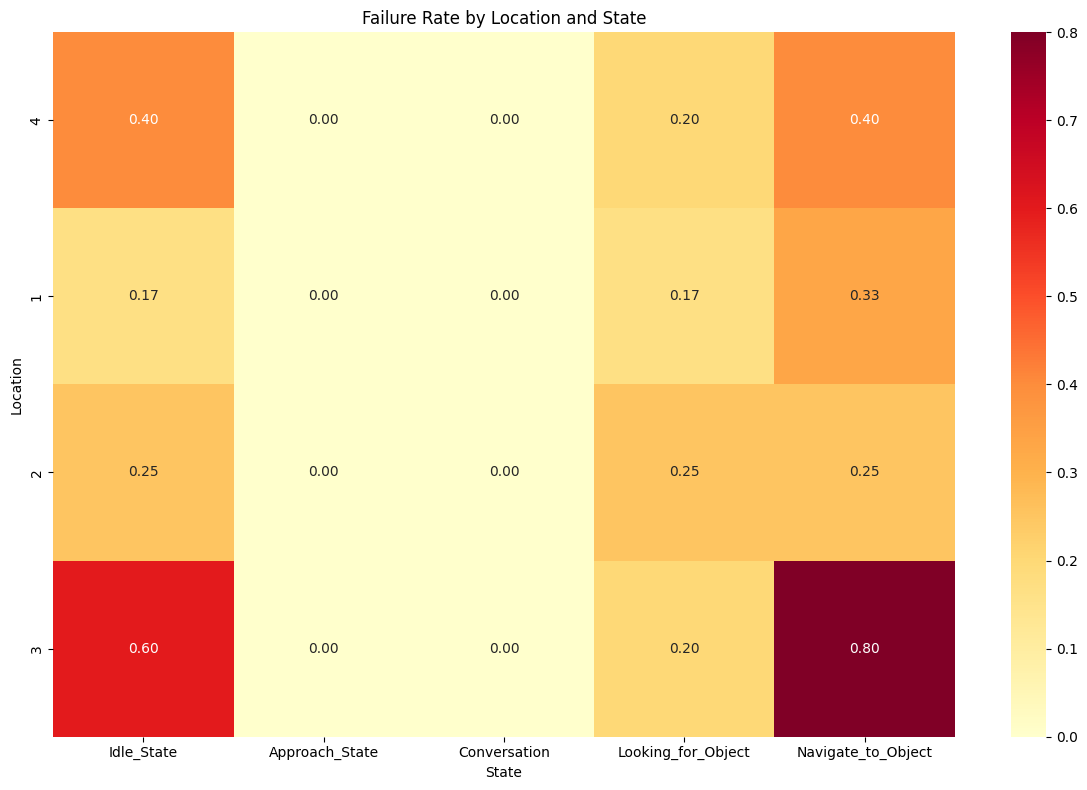

In [11]:
# Plot 3: Heatmap of failures by location and state
failure_matrix = pd.pivot_table(
    states_df,
    values='Success',
    index='Location',
    columns='State',
    aggfunc=lambda x: 1 - np.mean(x),  # Converting to failure rate
    sort=False
)


plt.figure(figsize=(12, 8))
sns.heatmap(failure_matrix, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Failure Rate by Location and State')
plt.tight_layout()
plt.show()